In [19]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [20]:
rain_minimum = 1.0
rain_maximum = 120.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


 

In [21]:

pr = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/cru/cru_ts4.06.1901.2021.pre.dat.nc')

pr




<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1452)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [22]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))


In [23]:
pr= pr.sel(lon=slice(86,94),lat=slice(18,27))
pr

<xarray.Dataset>
Dimensions:  (lon: 16, lat: 18, time: 431)
Coordinates:
  * lon      (lon) float32 86.25 86.75 87.25 87.75 ... 92.25 92.75 93.25 93.75
  * lat      (lat) float32 18.25 18.75 19.25 19.75 ... 25.25 25.75 26.25 26.75
  * time     (time) datetime64[ns] 1980-02-15 1980-03-16 ... 2015-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [24]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [25]:
size = pr.pre.shape
print(size)


(431, 18, 16)


In [26]:
for time in range(size[0]):
        data = pr.pre[time,Ellipsis] / mpy
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]
        #print(rain_bin)


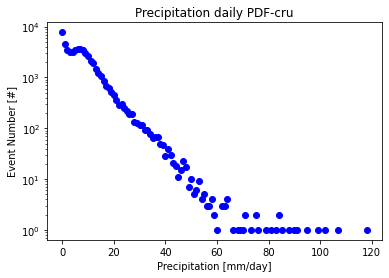

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-cru')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_cru.png")



plt.show( )